In [7]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
#call data of a stock 

ticker = 'MSFT'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2016-1-1', end='2019-7-29')['Adj Close']

In [30]:
#We will use the Euler Discretization formula

$$
S_t = S_{t-1} \cdot exp((r - 0.5 \cdot stdev^2) \cdot delta_t + stdev \cdot delta_t^2 \cdot Z_t)
$$

In [31]:
log_returns = np.log(1 + data.pct_change())

In [32]:
r = 0.025

In [35]:
# s = standard deviation 
s = log_returns.std()* 250**0.5
s

MSFT    0.221814
dtype: float64

In [36]:
type(s)

pandas.core.series.Series

In [37]:
s = s.values
s

array([0.22181383])

In [38]:
# need to set up number of trading days
T = 1.0
t_intervals = 250
delta_t = T / t_intervals

iterations = 1000

In [39]:
# create the random conponent Z
Z = np.random.standard_normal((t_intervals + 1, iterations))
S = np.zeros_like(Z)
SO = data.iloc[-1]
S[0] = SO

$$
S_t = S_{t-1} \cdot exp((r - 0.5 \cdot stdev^2) \cdot delta_t + stdev \cdot delta_t^2 \cdot Z_t)
$$

In [40]:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * s ** 2) * delta_t + s * delta_t ** 0.5 * Z[t])

In [41]:
S

array([[141.02999878, 141.02999878, 141.02999878, ..., 141.02999878,
        141.02999878, 141.02999878],
       [142.97883299, 145.44813519, 138.95029685, ..., 144.9835317 ,
        141.87452558, 141.31241941],
       [144.34321729, 148.26895812, 137.82158793, ..., 144.26659899,
        145.96154259, 145.48744174],
       ...,
       [104.16348308, 167.80097915, 135.47263471, ..., 191.97097438,
        210.54432277, 144.65879632],
       [102.4496181 , 165.79228077, 134.88544001, ..., 191.66750615,
        210.64187254, 145.11645734],
       [104.24794002, 161.82624332, 137.10988594, ..., 195.11724861,
        211.43711755, 147.86587484]])

In [43]:
S.shape

(251, 1000)

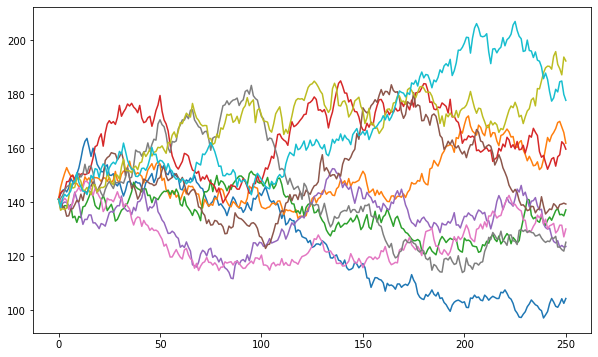

In [45]:
#plot ten iterations 
plt.figure(figsize=(10,6))
#plot first 10 iterations
plt.plot(S[:,:10])

In [56]:
# strike price 160
p = np.maximum(S[-1] - 160, 0)

In [57]:
p

array([0.00000000e+00, 1.82624332e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.23115792e+01, 1.77263180e+01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 7.50206024e+00, 0.00000000e+00,
       0.00000000e+00, 1.43165072e+01, 0.00000000e+00, 1.90095482e+01,
       0.00000000e+00, 0.00000000e+00, 1.37741690e+01, 0.00000000e+00,
       1.00010951e+02, 3.52302516e+01, 0.00000000e+00, 0.00000000e+00,
       4.80332550e+01, 4.07280388e+01, 0.00000000e+00, 1.39522246e+01,
       0.00000000e+00, 9.77111868e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.20357792e+01, 0.00000000e+00, 0.00000000e+00,
       3.67559793e+01, 0.00000000e+00, 0.00000000e+00, 2.81023519e+01,
       0.00000000e+00, 0.00000000e+00, 2.25823059e+01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.58865234e+00, 0.00000000e+00,
       2.50498353e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [54]:
p.shape

(1000,)

<H2> Forcast the cost of stock options</h2>
<br>
<br>
$$
C = \frac{exp(-r \cdot T) \cdot \sum{p_i}}{iterations}
$$

In [58]:
C = np.exp(-r * T) * np.sum(p) / iterations
C

7.949057129735547

<p>Run the code multiple times as each time you may get a different result. To verify if your formual is work reffer to the Black Scholes formula as the result should be similar. </p>
<p>When I run a strike price of 160 on the black and scholes formula I get a price of 6.94 and I get a price of 7.94 with this forcast. Average is 7.44</p>
<p>Current ask today July 30 2019 is at 13:03 cental time is 19.50 so this would not be a good buy.</p>
